# Reading TRT traces

In [1]:
import json
from viztracer import VizTracer
from pathlib import Path
from perfetto.trace_processor import TraceProcessor


In [4]:
trace_file = Path("./assets/_run_on_acc_0_engine_engine_exectuion_profile.trace")

In [5]:
tp = TraceProcessor(trace=str(trace_file))


In [13]:
qr_it = tp.query('SELECT ts, dur, name FROM slice')
qr_df = qr_it.as_pandas_dataframe()
# sort by dur
qr_df = qr_df.sort_values(by='dur', ascending=False)
# filter geq 800000
qr_df = qr_df[qr_df['dur'] >= 400000]
print(qr_df)

           ts     dur                                               name
318  61140100  829440         __myl_DivMulResTraResRepConMulSum_myl86_84
288  53179400  829440         __myl_DivMulResTraResRepConMulSum_myl86_54
333  65124500  829440         __myl_DivMulResTraResRepConMulSum_myl86_99
303  57160800  825344         __myl_DivMulResTraResRepConMulSum_myl86_69
273  49221400  822272         __myl_DivMulResTraResRepConMulSum_myl86_39
..        ...     ...                                                ...
148  41035000  509952  [MATRIX_MULTIPLY]_[aten_ops_addmm_default]_[ne...
88   23731300  509952  [MATRIX_MULTIPLY]_[aten_ops_addmm_default]_[ne...
341  67977300  459776  [MATRIX_MULTIPLY]_[aten_ops_addmm_default]_[ne...
197  43153700  428032  [CONVOLUTION]-[aten_ops.convolution.default]-[...
8      574560  407552  [MATRIX_MULTIPLY]_[aten_ops_addmm_default]_[ne...

[82 rows x 3 columns]


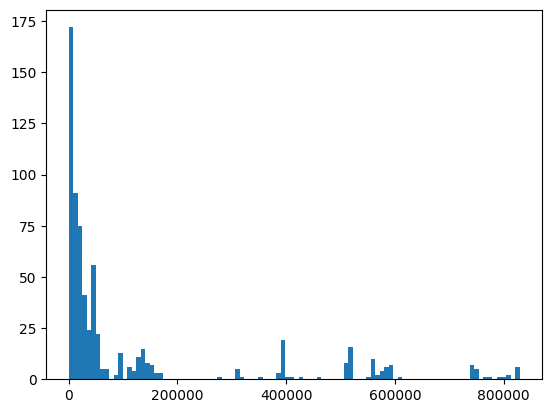

In [11]:
# plot duration distribution
import matplotlib.pyplot as plt
plt.hist(qr_df['dur'], bins=100)
plt.show()

In [25]:
with open(trace_file, "r") as f:
    trace = json.load(f)
